In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import os

In [23]:
url = "https://cran.r-project.org/incoming/UL/diversedata/data-clean/hcmst.csv"
hcmst = pd.read_csv(url).dropna()

# write a copy of the data to data/
os.makedirs('data', exist_ok = True) # create data directory if it does not exist 

output_path = 'data/hcmst.csv'

hcmst.to_csv(output_path, index = False)

In [24]:
hcmst.head()

,subject_age,subject_education,subject_sex,subject_ethnicity,subject_income_category,subject_employment_status,same_sex_couple,married,sex_frequency,flirts_with_partner,...,relationship_duration,children,rel_change_during_pandemic,inc_change_during_pandemic,subject_had_covid,partner_had_covid,subject_vaccinated,partner_vaccinated,agree_covid_approach,relationship_quality
0,53.0,high_school_grad,female,white,35k_40k,working_paid_employee,no,not_married,once_or_twice_a_week,a_few_times_a_week,...,1.500000,2.0,better_than_before,no_change,no,yes,not_vaccinated,not_vaccinated,completely_agree,excellent
1,72.0,some_college,female,white,75k_85k,working_paid_employee,no,married,once_a_month_or_less,never,...,57.416668,1.0,no_change,worse,no,no,fully_vaccinated_and_booster,fully_vaccinated_and_booster,mostly_agree,good
2,43.0,associate_degree,male,white,75k_85k,working_paid_employee,no,married,once_or_twice_a_week,a_few_times_a_week,...,22.333334,5.0,no_change,worse,no,no,fully_vaccinated_and_booster,fully_vaccinated_and_booster,completely_agree,excellent
3,64.0,some_college,male,white,75k_85k,working_paid_employee,no,married,once_or_twice_a_week,1_to_3_times_a_month,...,28.250000,2.0,no_change,no_change,no,no,fully_vaccinated_and_booster,fully_vaccinated_and_booster,completely_agree,good
4,60.0,high_school_grad,female,black,75k_85k,working_paid_employee,no,married,once_or_twice_a_week,a_few_times_a_week,...,38.916668,3.0,better_than_before,no_change,no,no,not_vaccinated,partially_vaccinated,completely_agree,excellent


In [25]:
alt.Chart(hcmst).mark_bar(size = 150).encode(
    x=alt.X('relationship_quality', title='Relationship Quality'),
    y='count()'
).properties(
    title='Distribution of Relationship Quality',
    width = 'container'
)

alt.Chart(...)

Text(0.5, 1.0, 'Correlation Matrix of Relevant Predictor Variables')

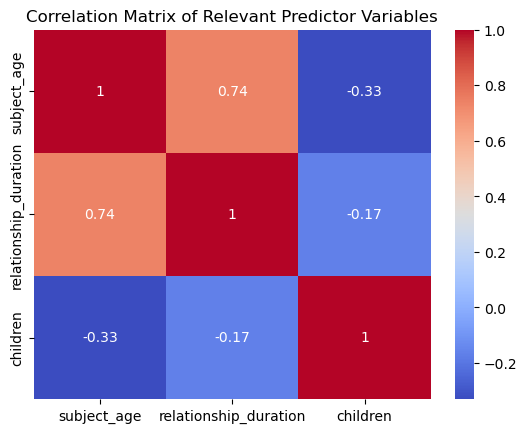

In [26]:
corr_mat = hcmst[['subject_age','relationship_duration', 'children']].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Relevant Predictor Variables')

In [27]:
income_order = [
    'under_5k',
    '5k_7k',
    '7k_10k',
    '10k_12k',
    '12k_15k',
    '15k_20k',
    '20k_25k',
    '25k_30k',
    '30k_35k',
    '35k_40k',
    '40k_50k',
    '50k_60k',
    '60k_75k',
    '75k_85k',
    '85k_100k',
    '100k_125k',
    '125k_150k',
    '150k_175k',
    '175k_200k',
    '200k_250k',
    'over_250k'
]

alt.Chart(hcmst).mark_bar().encode(
    x=alt.X(
        'subject_income_category',
        sort=income_order,
        title='Income Category'
    ),
    y='count()'
).properties(
    title='Distribution of Income Category',
    width = 'container'
)


alt.Chart(...)

In [28]:
# Clean Data
from sklearn.model_selection import train_test_split

X = hcmst[['subject_age', 'subject_income_category', 'married', 'relationship_duration', 'children']].copy()
y = hcmst['relationship_quality'].copy()

# split data into train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 123
)

# simple data cleaning - change subject age and children from floats to intgers 
X['subject_age'] = X['subject_age'].astype(int)
X['children'] = X['children'].astype(int)

# reorder income category 
X['subject_income_category'] = X['subject_income_category'].astype('category')
X['subject_income_category'] = X['subject_income_category'].cat.reorder_categories(
    ['under_5k', '5k_7k', '7k_10k', '10k_12k', '12k_15k', '15k_20k', '20k_25k', '25k_30k', '30k_35k', '35k_40k', '40k_50k', '50k_60k', '60k_75k', '75k_85k', '85k_100k', '100k_125k', '125k_150k', '150k_175k', '175k_200k', '200k_250k', 'over_250k'], ordered = True 
)

X['subject_income_category'].cat.categories.tolist()

['under_5k',
 '5k_7k',
 '7k_10k',
 '10k_12k',
 '12k_15k',
 '15k_20k',
 '20k_25k',
 '25k_30k',
 '30k_35k',
 '35k_40k',
 '40k_50k',
 '50k_60k',
 '60k_75k',
 '75k_85k',
 '85k_100k',
 '100k_125k',
 '125k_150k',
 '150k_175k',
 '175k_200k',
 '200k_250k',
 'over_250k']

In [29]:
# preprocess the data by applying the appropriate transformations to each
numeric_features = ['subject_age', 'relationship_duration', 'children']
ordinal_features = ['subject_income_category']
categorical_features = ['married']

# create a column transformer that applies transformations to each type of feature
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='if_binary'), categorical_features),
    (OrdinalEncoder(), ordinal_features)
)

preprocessor

,transformers,"[('standardscaler', ...), ('onehotencoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [30]:
# fit model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

preprocessor.fit(X_train)
logreg = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight='balanced'))
logreg.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression using training data')

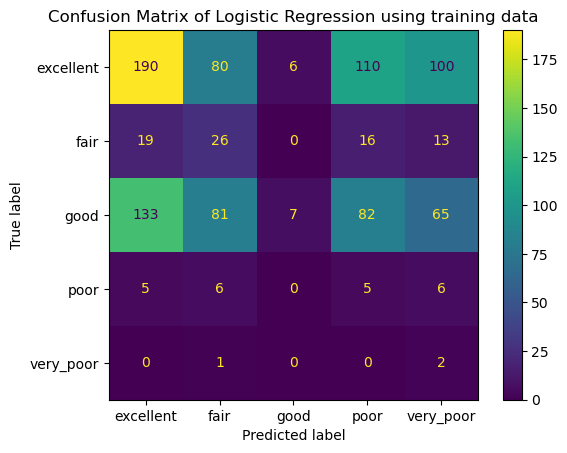

In [31]:
# training confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_train, y_train)
plt.grid(False)
plt.title('Confusion Matrix of Logistic Regression using training data')

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression using testing data')

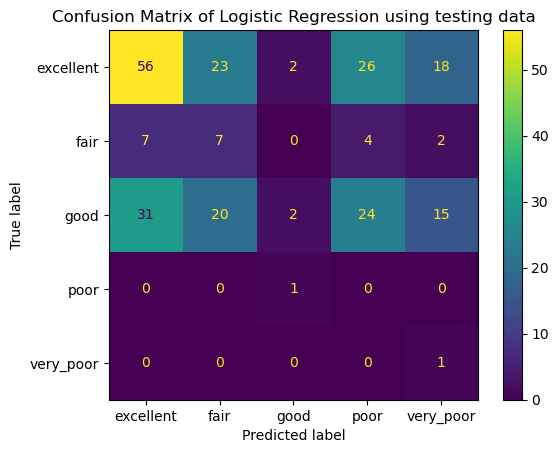

In [32]:
# testing confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.grid(False)
plt.title('Confusion Matrix of Logistic Regression using testing data')

In [33]:
# micro-average auc roc
from sklearn.metrics import roc_auc_score
y_score = logreg.predict_proba(X_test)
micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.60


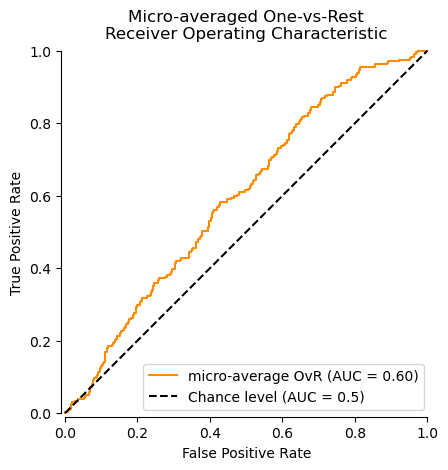

In [34]:
# micro-averaged auc roc plot
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    curve_kwargs=dict(color="darkorange"),
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)